In [17]:
import pandas as pd
import numpy as np

import requests
import datetime

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams.update({'figure.figsize':(6,4)})

In [2]:
## geting cryptio live data for api
CoinDeskUrl = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017,1,1)
end = datetime.date(2020,1,1)

url = f'{CoinDeskUrl}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)

In [3]:
## connveting data to pandas
data= pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data.head()

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


<AxesSubplot:xlabel='date'>

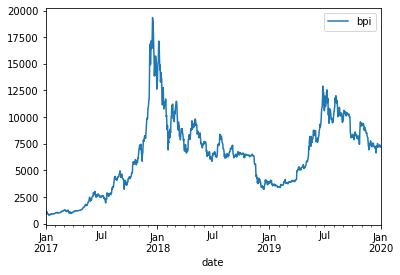

In [4]:
data.plot()

# Functions :

## 1. Resample:
1. we have data in a formate of hour , day , month , yearly and if it is in like hour dat then it can be diffucult to visualiz the data so we use resampling to resample data in mont , 6month quaterly , or yearly level

<AxesSubplot:title={'center':'Yearly'}, xlabel='date'>

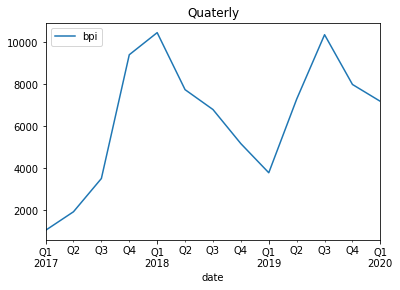

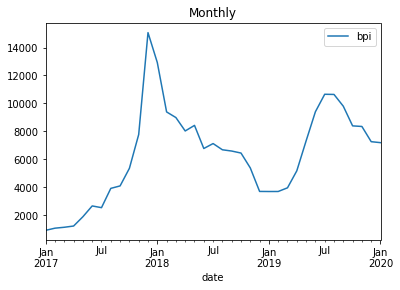

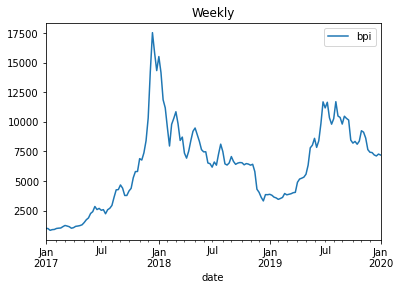

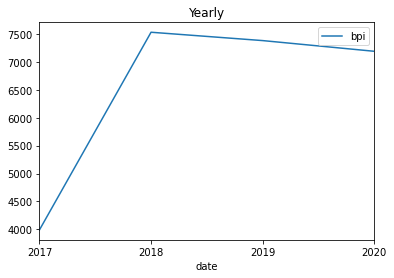

In [5]:
## resempling for quaterly
data.resample('Q').mean().plot(title='Quaterly')
## resempling for monthly
data.resample('m').mean().plot(title='Monthly')
## resempling for monthly
data.resample('w').mean().plot(title='Weekly')
## resempling for monthly
data.resample('y').mean().plot(title='Yearly')

## 2. Diff :
1. it take data t and substract i data t-1 from it , it depend on the value of diff how many previous eltements to take.
2. it helps to make data stationary or smooth the curve

In [6]:
pd.concat([data[:5] ,data[:5].diff(),data[:5].diff(2)] , axis=1)

,bpi,bpi,bpi
date,,,
2017-01-01,997.6888,NaN,NaN
2017-01-02,1018.0500,20.3612,NaN
2017-01-03,1030.8175,12.7675,33.1287
2017-01-04,1129.8700,99.0525,111.8200
2017-01-05,1005.8150,-124.0550,-25.0025


<AxesSubplot:xlabel='date'>

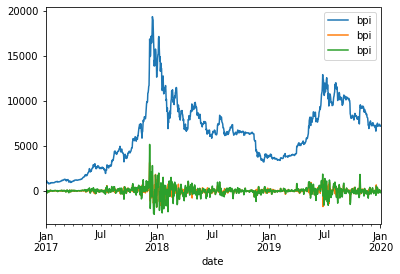

In [7]:
pd.concat([data ,data.diff(),data.diff(2)],axis=1).plot()

## 3. Shift:
1. the shift function shift the value forward with some window or lag value. if we select the shift(2) then the value shift to position forward
2. it also helps to make data stationary and also use for predicating the future data.

In [8]:
pd.concat([data[:5],data[:5].shift(),data[:5].shift(2)],axis=1)

,bpi,bpi,bpi
date,,,
2017-01-01,997.6888,NaN,NaN
2017-01-02,1018.0500,997.6888,NaN
2017-01-03,1030.8175,1018.0500,997.6888
2017-01-04,1129.8700,1030.8175,1018.0500
2017-01-05,1005.8150,1129.8700,1030.8175


<AxesSubplot:xlabel='date'>

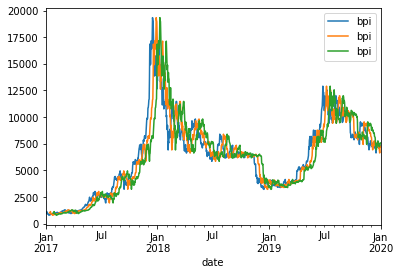

In [9]:
pd.concat([data,data.shift(12),data.shift(24)],axis=1).plot()

## 4. tShift:
1. tshift is a similar function as shift but instead of value shifting it shift the index or time of a data

In [10]:
pd.concat([data[:5],data[:5].tshift()],axis=1)

<ipython-input-10-d1eb5609937c>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  pd.concat([data[:5],data[:5].tshift()],axis=1)


,bpi,bpi
date,,
2017-01-01,997.6888,NaN
2017-01-02,1018.0500,997.6888
2017-01-03,1030.8175,1018.0500
2017-01-04,1129.8700,1030.8175
2017-01-05,1005.8150,1129.8700
2017-01-06,NaN,1005.8150


<ipython-input-11-20c6fa35b800>:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  pd.concat([data,data.tshift(365)],axis=1).plot()


<AxesSubplot:xlabel='date'>

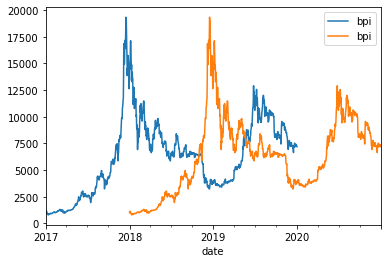

In [11]:
# because we have data in day formate so we use 365 to shift data 1 year away
pd.concat([data,data.tshift(365)],axis=1).plot()

## 5. rolling:
1. it is simple moving average it is a function which takes some input as window and then it caclulate the mean of that much previous values .like if windows = 2 then it take the mean ot t , t-1 and then fill the t value
2. it smooth th curve

In [12]:
pd.concat([data[:5],data[:5].rolling(window=2).mean()],axis=1)

,bpi,bpi
date,,
2017-01-01,997.6888,NaN
2017-01-02,1018.0500,1007.86940
2017-01-03,1030.8175,1024.43375
2017-01-04,1129.8700,1080.34375
2017-01-05,1005.8150,1067.84250


<AxesSubplot:xlabel='date'>

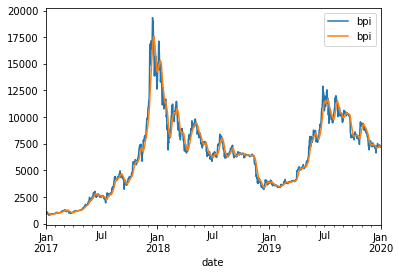

In [13]:
pd.concat([data,data.rolling(window=10).mean()],axis=1).plot()

<AxesSubplot:xlabel='date'>

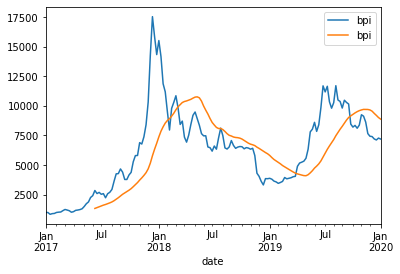

In [14]:
## here we resampling the data in week level then calculating the rolling window
pd.concat([data.resample('w').mean(),data.resample('w').mean().rolling(24).mean()],axis=1).plot()

## 6. EWM:
1. exponential moving average it is simaler to rolling moving average but it also consider the weights

In [15]:
pd.concat([data[:5],data[:5].ewm(span=12).mean()],axis=1)

,bpi,bpi
date,,
2017-01-01,997.6888,997.688800
2017-01-02,1018.0500,1008.717783
2017-01-03,1030.8175,1017.343308
2017-01-04,1129.8700,1052.863587
2017-01-05,1005.8150,1040.080654


<AxesSubplot:xlabel='date'>

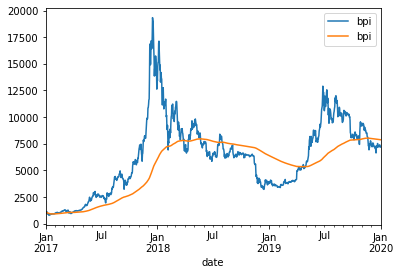

In [16]:
pd.concat([data,data.ewm(span=365).mean()],axis=1).plot()

## 7. Groupby the Day,Month ,Week level
1. used to see what is the average sales in week in month etc.

In [25]:
## day of the week with average price
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,6315.547006
1,6291.389258
2,6293.319713
3,6269.227818
4,6306.196397
5,6336.266624
6,6292.587989


In [29]:
data.groupby(data.index.month).mean()

,bpi
date,
1,5856.957484
2,4714.987062
3,4689.855035
4,4804.689332
5,5874.068528
6,6275.936248
7,6769.746387
8,7077.441969
9,6825.175222


In [30]:
data.groupby(data.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,7188.463300


<AxesSubplot:title={'center':'Yearly Average'}, xlabel='date'>

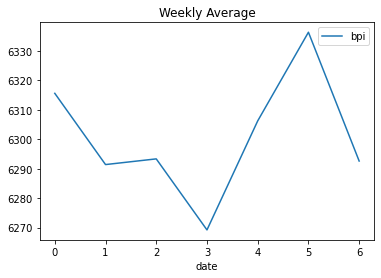

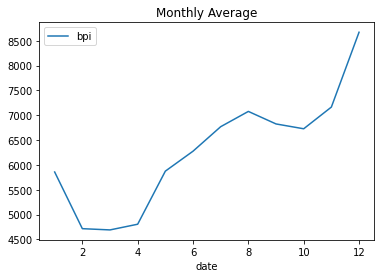

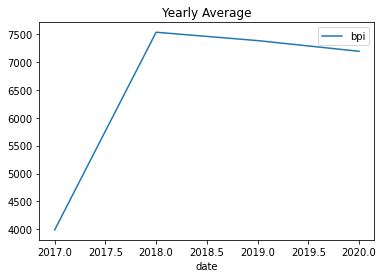

In [33]:
data.groupby(data.index.dayofweek).mean().plot(title='Weekly Average')
data.groupby(data.index.month).mean().plot(title='Monthly Average')
data.groupby(data.index.year).mean().plot(title='Yearly Average')

## 8. cumsum:
1. it is a function which takes all the previous values and give the sum.
 1. like for t2 = t2+t1 , t3 = t3+t2+t1 , t4 = t4+t3+t2+t1 

In [34]:
pd.concat([data[:5],data[:5].cumsum()],axis=1)

,bpi,bpi
date,,
2017-01-01,997.6888,997.6888
2017-01-02,1018.0500,2015.7388
2017-01-03,1030.8175,3046.5563
2017-01-04,1129.8700,4176.4263
2017-01-05,1005.8150,5182.2413


## 9. Percetage change : pct_change:
1 . it gives the percentage grouth b/w the values and it take the parameter which tells about how many value we need to consider to calculate percentage change.

In [50]:
pd.concat([data[:5],data[:5].pct_change()],axis=1)

,bpi,bpi
date,,
2017-01-01,997.6888,NaN
2017-01-02,1018.0500,0.020408
2017-01-03,1030.8175,0.012541
2017-01-04,1129.8700,0.096091
2017-01-05,1005.8150,-0.109796


## 10. Expanding :
1. it is similar to the function cumsum but it have more features then it . 
2. we can calculate the mean , max , mode , median , and sum as well.

In [54]:
pd.concat([data[:5],data[:5].expanding().mean()],axis=1)

,bpi,bpi
date,,
2017-01-01,997.6888,997.688800
2017-01-02,1018.0500,1007.869400
2017-01-03,1030.8175,1015.518767
2017-01-04,1129.8700,1044.106575
2017-01-05,1005.8150,1036.448260
